## Assignment-03 First Step of Machine Learning: Model and Evaluation

同学们，今天我们的学习了基本的机器学习概念，相比你已经对机器学习的这些方法有一个基本的认识了。值得说明的是，机器学习不仅仅是一系列方法，更重要的是一种思维体系，即：依据以往的、现有的数据，构建某种方法来解决未见过的问题。而且决策树，贝叶斯只是实现这个目标的一个方法，包括之后的神经网络。很有可能有一天，神经网络也会被淘汰，但是重要的是我们要理解机器学习的目标，就是尽可能的自动化解决未知的问题。

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1571556399207&di=4a97dc15ad08dd49d3748d1edf6109b3&imgtype=0&src=http%3A%2F%2Fc.hiphotos.baidu.com%2Fzhidao%2Fwh%3D450%2C600%2Fsign%3Dae742c6aedcd7b89e93932873a146e91%2F5d6034a85edf8db1b16050c40223dd54574e74c7.jpg)

## Part-1 Programming Review 编程回顾

#### 1. Re-code the Linear-Regression Model using scikit-learning(10 points)

<评阅点>： 
> + 是否完成线性回归模型 (4')
+ 能够进行预测新数据(3')
+ 能够进行可视化操作(3')

In [57]:
import numpy as np
random_data = np.random.random((50,2))
random_data

array([[0.53205878, 0.14742746],
       [0.95881178, 0.08665282],
       [0.50237169, 0.59507446],
       [0.19799102, 0.84249909],
       [0.60645407, 0.16162259],
       [0.79604706, 0.6509452 ],
       [0.18792756, 0.65533349],
       [0.09268573, 0.71483529],
       [0.28041499, 0.31112171],
       [0.88801873, 0.39007983],
       [0.40549432, 0.21610464],
       [0.77869913, 0.24147898],
       [0.96166241, 0.25065439],
       [0.94593721, 0.254637  ],
       [0.68583007, 0.52163469],
       [0.88352697, 0.19048779],
       [0.53070713, 0.29251739],
       [0.17475462, 0.08331902],
       [0.76095428, 0.5436496 ],
       [0.90176594, 0.13249941],
       [0.10678746, 0.66874635],
       [0.37847439, 0.36629483],
       [0.54916329, 0.12287039],
       [0.86236273, 0.30018295],
       [0.40651815, 0.87316578],
       [0.20929724, 0.9741715 ],
       [0.87472488, 0.43696867],
       [0.65028183, 0.50936419],
       [0.73863274, 0.55888844],
       [0.67221946, 0.79823434],
       [0.

In [2]:
X = random_data[:,0]
print (X)

[0.31167284 0.92252185 0.85038737 0.59442162 0.63144379 0.49031999
 0.11356758 0.34527377 0.53984297 0.73677523 0.07129308 0.05652815
 0.32737566 0.29942673 0.86575445 0.58964227 0.18905271 0.22819013
 0.57587352 0.19561402 0.52407428 0.85600944 0.69485251 0.84996478
 0.76867765 0.527018   0.50250097 0.09865156 0.21604011 0.47880617
 0.55527301 0.10923875 0.94957627 0.59738145 0.50443576 0.37131956
 0.37924897 0.38439852 0.35907875 0.01325808 0.58323449 0.9327495
 0.46848636 0.63856163 0.35050966 0.2651454  0.71845038 0.58750052
 0.64494667 0.99858759]


In [3]:
import random
def creat_function(x):
    return 14.5*x + 6 + random.randint(-6,6)

In [4]:
y = [creat_function(x) for x in X]

In [5]:
import matplotlib.pyplot as plt

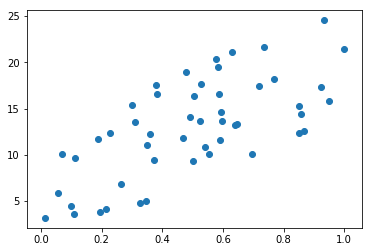

In [6]:
plt.scatter(X,y)

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
reg = LinearRegression().fit(X.reshape(-1,1),y)

In [13]:
reg.score(X.reshape(-1,1),y)

0.5453662034984881

In [9]:
reg.coef_

array([13.90309009])

In [10]:
reg.intercept_

6.05681887893322

In [11]:
def creat_LR(x):
    return reg.coef_*x + reg.intercept_

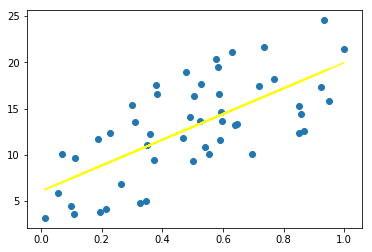

In [13]:
plt.scatter(X,y)
plt.plot(X,creat_LR(X),color = 'yellow')

In [38]:
reg.predict([[0.2]])

array([8.8374369])

#### 2. Complete the unfinished KNN Model using pure python to solve the previous Line-Regression problem. (8 points)

<评阅点>:
> + 是否完成了KNN模型 (4')
+ 是否能够预测新的数据 (4')

In [45]:
def model (X,y):
    return [(Xi,yi) for Xi,yi in zip(X,y)]

In [16]:
from scipy.spatial.distance import cosine

In [54]:
def distance (x1,x2):
    return abs(x1-x2)

In [55]:
def predict(x,k=5):
    most_similar = sorted(model(X,y), key = lambda xi:distance(xi[0],x))[:k]
    print (most_similar)
    y_hats = [_y for x,_y in most_similar]
   
    return np.mean(y_hats)
                          

In [56]:
predict(0.2)

[(0.1956140239548756, 3.836403347345696), (0.18905271176283378, 11.74126432056109), (0.21604010939842688, 4.13258158627719), (0.2281901299622522, 12.308756884452656), (0.26514539955036487, 6.844608293480292)]


7.772722886423385

#### 3. Re-code the Decision Tree, which could sort the features by salience. (12 points)

<评阅点>
> + 是否实现了信息熵 (1' )
+ 是否实现了最优先特征点的选择(5')
+ 是否实现了持续的特征选则(6')

In [54]:
from collections import Counter

In [55]:
def entropy(element):
    counter = Counter(element)
    
    prob = [counter[c]/len(element) for c in set(element)]
    
    print ('prob:',prob)
    return -sum(p * np.log(p) for p in prob)

In [58]:
entropy([1,1,1,0,2])

prob: [0.2, 0.6, 0.2]


0.9502705392332347

In [152]:
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
   # 'pet': [1, 1, 1, 0, 0, 0, 1],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}

In [153]:
import pandas as pd

In [154]:
dataset = pd.DataFrame.from_dict(mock_data)

In [155]:
dataset

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
2,F,+10,2,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0
6,M,-10,2,1


In [63]:
#split_by_gender
print(entropy([1,1,1,0])+entropy([0,0,1]))

#split_by_income
print(entropy([1,1,0,0,0])+entropy([1,1]))

#split_by_family_member
print(entropy([1,1,0,0,0])+entropy([1,1]))

prob: [0.25, 0.75]
prob: [0.6666666666666666, 0.3333333333333333]
1.198849312913621
prob: [0.6, 0.4]
prob: [1.0]
0.6730116670092565
prob: [0.6, 0.4]
prob: [1.0]
0.6730116670092565


#### income和family_number熵最小，选income作为root node，因为-10的一定会买，只分析+10情况

In [64]:
sub1_split_by_income=dataset[dataset['income']=='+10']
sub1_split_by_income

,gender,income,family_number,bought
0,F,+10,1,1
2,F,+10,2,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0


In [65]:
#已知income为-10时，一定会买，所以分析为+10的情况  sub2_split_by_gender

#gender
print (entropy([1,1,0])+entropy([0,0]))

#family_number
print(entropy([1,0,0,0])+entropy([1]))

prob: [0.3333333333333333, 0.6666666666666666]
prob: [1.0]
0.6365141682948128
prob: [0.75, 0.25]
prob: [1.0]
0.5623351446188083


#### 因为family_member的熵小，选它为第二个。当family_number为2时，一定会买，所以在1的情况下，女性有一半的概率会买，男性一定不会买

In [149]:
def find_optimal_spilter(training_data:pd.DataFrame,target:str)-> str:
    x_fields = set(training_data.columns.tolist()) - {target}
    #print(list(x_fields))
    n = []
    
    spliter = None
    min_entropy = float('inf')
    for f in x_fields:
        #print('f:',f)
        value = set(training_data[f])
       # print ('value:',value)
        for v in value:
            sub_spliter_1 = training_data[training_data[f] == v][target].tolist()
         #   print('sub_spliter_1:',sub_spliter_1)
            entropy_1 = entropy(sub_spliter_1)
         #   print (entropy_1)
            
            sub_spliter_2 = training_data[training_data[f] != v][target].tolist()
         #   print('sub_spliter_2:',sub_spliter_2)
            entropy_2 = entropy(sub_spliter_2)
         #   print(entropy_2)
            entropy_s = entropy_1 + entropy_2
         #   print ('entropy_s:',entropy_s)
            
            if entropy_s < min_entropy:
                min_entropy = entropy_s
                spliter = (f, v)
    print('spliter is: {}'.format(spliter))
    print('the min entropy is: {}'.format(min_entropy))
    
    '''n.add(spliter)
    while n:

        s = spliter[0]
        v = spliter[1]
        data = training_data[training_data[s] == v]
        find_optimal_spilter(data,'bought')
        for e in spliter:
            if e == spliter:
                return n'''
    return spliter[0]

In [148]:
find_optimal_spilter(dataset,'bought')

['income', 'gender', 'family_number']
prob: [0.6, 0.4]
prob: [1.0]
prob: [1.0]
prob: [0.6, 0.4]
prob: [0.25, 0.75]
prob: [0.6666666666666666, 0.3333333333333333]
prob: [0.6666666666666666, 0.3333333333333333]
prob: [0.25, 0.75]
prob: [0.6, 0.4]
prob: [1.0]
prob: [1.0]
prob: [0.6, 0.4]
spliter is: ('income', '+10')
the min entropy is: 0.6730116670092565


'income'

In [72]:
find_optimal_spilter(dataset[dataset['family_number'] == 1], 'bought')

prob: [0.75, 0.25]
prob: [1.0]
prob: [1.0]
prob: [0.75, 0.25]
prob: [0.3333333333333333, 0.6666666666666666]
prob: [1.0]
prob: [1.0]
prob: [0.3333333333333333, 0.6666666666666666]
prob: [0.6, 0.4]
prob: []
spliter is: ('income', '+10')
the min entropy is: 0.5623351446188083


In [73]:
fm_n_1 = dataset[dataset['family_number'] == 1]

In [74]:
find_optimal_spilter(fm_n_1[fm_n_1['income'] == '+10'], 'bought')

prob: [0.75, 0.25]
prob: []
prob: [0.5, 0.5]
prob: [1.0]
prob: [1.0]
prob: [0.5, 0.5]
prob: [0.75, 0.25]
prob: []
spliter is: ('income', '+10')
the min entropy is: 0.5623351446188083


#### 4. Finish the K-Means using 2-D matplotlib (8 points)

<评阅点>
> + 是否完成了KMeans模型，基于scikit-learning (3')
+ 是否完成了可视化任务（5'）

In [166]:
from sklearn.cluster import KMeans

In [168]:
X1 = [random.randint(0, 100) for _ in range(100)]
X2 = [random.randint(0, 100) for _ in range(100)]

X1: [17, 61, 30, 28, 77, 54, 29, 95, 78, 40, 17, 70, 91, 26, 55, 89, 23, 1, 10, 24, 5, 65, 51, 77, 14, 100, 97, 98, 32, 29, 53, 56, 76, 60, 48, 51, 48, 35, 51, 56, 33, 14, 100, 38, 66, 89, 51, 70, 88, 1, 87, 33, 55, 5, 67, 49, 36, 51, 49, 8, 11, 43, 16, 9, 23, 85, 79, 59, 49, 80, 52, 55, 53, 90, 88, 100, 4, 85, 40, 52, 9, 23, 80, 96, 10, 2, 26, 97, 28, 98, 99, 11, 1, 60, 68, 29, 86, 22, 59, 70]


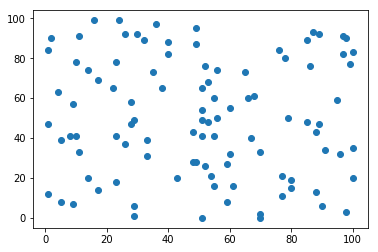

In [169]:
plt.scatter(X1, X2)

In [170]:
training_data = [(x1,x2) for x1,x2 in zip(X1,X2)]

In [171]:
cluster = KMeans(n_clusters=6, max_iter=500)

In [172]:
cluster.fit(training_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [173]:
cluster.cluster_centers_

array([[90.58333333, 83.        ],
       [15.83333333, 32.27777778],
       [52.6       , 15.4       ],
       [53.16666667, 57.83333333],
       [85.58823529, 27.64705882],
       [24.05      , 84.25      ]])

In [174]:
cluster.labels_

array([5, 2, 5, 3, 4, 2, 2, 0, 0, 5, 1, 2, 4, 1, 3, 0, 5, 1, 5, 5, 1, 3,
       3, 4, 5, 0, 0, 4, 5, 1, 3, 3, 0, 3, 2, 3, 3, 5, 3, 3, 1, 1, 4, 3,
       3, 4, 3, 4, 4, 5, 0, 1, 2, 1, 4, 2, 5, 2, 5, 1, 1, 2, 5, 1, 1, 0,
       4, 2, 5, 4, 3, 3, 3, 4, 4, 4, 5, 4, 5, 2, 1, 1, 4, 4, 1, 5, 5, 0,
       1, 0, 0, 5, 1, 2, 3, 2, 0, 5, 2, 2])

In [175]:
from collections import defaultdict

In [176]:
centers = defaultdict(list)

In [178]:
for label, location in zip(cluster.labels_, training_data):
    centers[label].append(location)

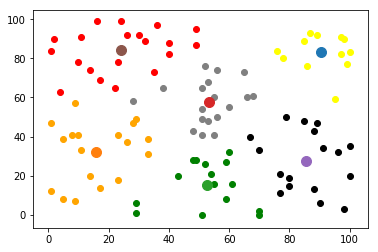

In [179]:
color = ['red', 'green', 'grey', 'black', 'yellow', 'orange']

for i, c in enumerate(centers):
    for location in centers[c]:
        plt.scatter(*location, c=color[i])
        
for center in cluster.cluster_centers_:
    plt.scatter(*center, s=100)

## Part-2 Question and Answer 问答

#### 1. What's the *model*? why  all the models are wrong, but some are useful? (5 points) 

Ans:1.什么是模型：明确需要达到的目标，收集数据并且找到一些features，根据features来选择一种方法达到目标，这个方法就是模型。
   2.因为在一个模型中牵扯到的因素有很多，很多features都是隐形，进而导致我们看到的是片面的，但是可以抓取主要特征来进行模拟并不断修改模型。

<评阅点>
> + 对模型的理解是否正确,对模型的抽象性是否正确(5')

#### 2. What's the underfitting and overfitting? List the reasons that could make model overfitting or underfitting. (10 points)

Ans:过拟合模型表现为在训练集上具有高方差和低偏差，这会导致对新测试数据预测时与训练数据的不一致；欠拟合模型表现为低方差和高偏差，是一个不合适的模型忽略了训练数据的教训，并且无法学习输入和输出之间的潜在关系。
如果模型无法将训练集的误差降到较低水平，就会发生欠拟合；如果模型无法缩小训练误差和和测试误差之间的差距，就会发生过拟合

<评阅点>
> + 对过拟合和欠拟合的理解是否正确 (3')
+ 对欠拟合产生的原因是否理解正确(2')
+ 对过拟合产生的原因是否理解正确(5')

#### 3. What's the precision, recall, AUC, F1, F2score. What are they mainly target on? (12')

Ans:Precision：精确率是针对预测结果而言的，它表示的是预测为正的样本中有多少是真正的正样本。
   recall：召回率是针对原来的样本而言的，它表示的是样本中的正例有多少被预测正确了。
   AUC：AUC全称Area Under roc Curve，是ROC曲线下的面积。ROC曲线是一条在二维平面上的曲线，横坐标是false positive rate，纵坐标是true positive       rate，ROC curve来表示分类器，可以用一个数值来表示分类器的好坏，即AUC，它是ROC曲线下面的面积。
   F1score：兼顾了精确率和召回率，是模型精确率和召回率的一种加权平均
   F2score：F-Score综合考虑Precision和Recall的调和值，当β=1是即F1score，这时召回率和精确率都很重要，权重相同。F2score表示召回率更加重要，此          时调整 β的值大于1

<评阅点>
> + 对precision, recall, AUC, F1, F2 理解是否正确(6‘)
+ 对precision, recall, AUC, F1, F2的使用侧重点是否理解正确 (6’)

#### 4. Based on our course and yourself mind, what's the machine learning?  (8')

Ans:机器学习：利用历史数据构建模型框架，随即将大量数据留给机器去学习，通过不断的修改和优化参数进而得到预期目标数据。
   传统编程：对于任何解决方案，第一个任务是创建最合适的算法并编写代码。之后必须设置输入参数，如果实现的算法没问题，将会产生预期的结果。

<评阅点> 开放式问题，是否能说出来机器学习这种思维方式和传统的分析式编程的区别（8'）

#### 5. "正确定义了机器学习模型的评价标准(evaluation)， 问题基本上就已经解决一半". 这句话是否正确？你是怎么看待的？ (8‘)

Ans: 评估指标能体现模型的运转情况，我们可以根据评估指标得到反馈，不断改进优化，直至达到理想的准确度。我们在构建一个机器学习模型时，
     期望使用在样本数据之外的数据也可以达到高准确度，所以找到正确定义模型的评价标准来提高模型预测的准确度是至关重要的。

<评阅点> 开放式问题，主要看能理解评价指标对机器学习模型的重要性.

## Part-03 Programming Practice 编程练习

1. In our course and previous practice, we complete some importance components of Decision Tree. In this problem, you need to build a **completed** Decision Tree Model. You show finish a `predicate()` function, which accepts three parameters **<gender, income, family_number>**, and outputs the predicated 'bought': 1 or 0.  (20 points)

##### 欠缺构造二叉树知识，因为时间问题只在已知决策树结构的情况下用简单的 if语句实现预测，后续会参照优秀作业修改

In [91]:
import random

def single_prob(p):

    if random.random() < p:

        return 0

    return 1

In [164]:
def predict_by_dicissiontree(G,I,F):
    if int(F) == 2:
        print ('bought:',1)
        return
    else:
        if int(I) <10:
            print ('bought:',1)
            return
        else:
            if G == 'M':
                print ('bought:',0)
                return
            else: 
                print (single_prob(0.5))
                return

In [160]:
gender = input('gender:')
income = input('income:')
family_number = input('family_number:')

gender:M
income:15
family_number:1


In [165]:
predict_by_dicissiontree(gender, income, family_number)

bought: 0


<评阅点>
> + 是否将之前的决策树模型的部分进行合并组装， predicate函数能够顺利运行(8')
+ 是够能够输入未曾见过的X变量，例如gender, income, family_number 分别是： <M, -10, 1>, 模型能够预测出结果 (12')

2. 将上一节课(第二节课)的线性回归问题中的Loss函数改成"绝对值"，并且改变其偏导的求值方式，观察其结果的变化。(19 point)

In [2]:
from sklearn.datasets import load_boston
import random

In [3]:
dataset = load_boston()

In [4]:
x,y=dataset['data'],dataset['target']

In [5]:
x.shape

(506, 13)

In [6]:
y.shape

(506,)

In [7]:
X_rm = x[:,5]
X_rm.shape

(506,)

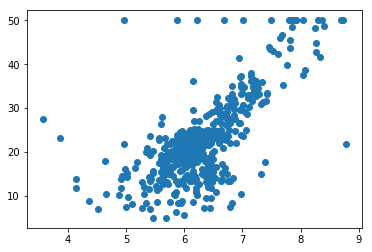

In [9]:
# plot the RM with respect to y
import matplotlib.pyplot as plt
plt.scatter(X_rm,y)

In [10]:
#define target function
def price(rm, k, b):
    return k * rm + b

In [11]:
# define loss function 
def loss(y,y_hat):
    return sum(abs(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y),list(y_hat)))/len(list(y))

In [21]:
# define partial derivative 

def partial_derivative_k(x,y, y_hat): 
    n = len(y)
    gradient = 0
    for x_i,y_i, y_hat_i in zip(list(x),list(y),list(y_hat)):
        if y_i>y_hat_i:
            gradient+=x_i
        if y_i<y_hat_i:
            gradient-=x_i
    
    return 1/n * gradient

def partial_derivative_b(y, y_hat):
    n = len(y)
    gradient = 0
    for y_i, y_hat_i in zip(list(y),list(y_hat)):
        if y_i > y_hat_i:
            c = -1/n
   
        if y_i < y_hat_i:
            c = 1/n
    return c

#### Q：请问初始参数k, b的大小会对结果产生什么影响呢

In [48]:
#initialized parameters
#k = random.random() * 10 - 5   我试了*10 - 5，这个效果并不好
k = random.random() * 100 - 50  #随手加了两个0后结果就相对不错了
b = random.random() * 100 - 50  

learning_rate = 0.06

iteration_num = 200
losses = []
for i in range(iteration_num):
    
    price_use_current_parameters = [price(r, k, b) for r in X_rm]  # \hat{y}
    #print (price_use_current_parameters)
    current_loss = loss(y, price_use_current_parameters)
    losses.append(current_loss)
    print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i,current_loss,k,b))
    
    k_gradient = partial_derivative_k( X_rm,y, price_use_current_parameters)
    #print (k_gradient)
    b_gradient = partial_derivative_b(y, price_use_current_parameters)
    
    k = k +  k_gradient * learning_rate
    b = b +  b_gradient * learning_rate
best_k = k
best_b = b

Iteration 0, the loss is 15.491296237817131, parameters k is 6.9639940926944774 and b is -36.68233024436761
Iteration 1, the loss is 13.267716433447022, parameters k is 7.331080614433608 and b is -36.68244882144271
Iteration 2, the loss is 11.195354995617848, parameters k is 7.690415515619379 and b is -36.68256739851781
Iteration 3, the loss is 9.430521661086821, parameters k is 8.021198005737956 and b is -36.68268597559291
Iteration 4, the loss is 7.892806889006278, parameters k is 8.335383499809103 and b is -36.68280455266801
Iteration 5, the loss is 6.6973319630239025, parameters k is 8.610251681627284 and b is -36.68268597559291
Iteration 6, the loss is 5.738946186708055, parameters k is 8.858726978069972 and b is -36.68256739851781
Iteration 7, the loss is 5.052534500884049, parameters k is 9.06941460652847 and b is -36.68244882144271
Iteration 8, the loss is 4.621015555316889, parameters k is 9.24538689901859 and b is -36.68233024436761
Iteration 9, the loss is 4.472399238586698,

Iteration 144, the loss is 4.43733218944909, parameters k is 9.443754962259728 and b is -36.666203762154105
Iteration 145, the loss is 4.437318499001449, parameters k is 9.441445199413879 and b is -36.666085185079005
Iteration 146, the loss is 4.437333744653047, parameters k is 9.443746661864472 and b is -36.665966608003906
Iteration 147, the loss is 4.437317880017403, parameters k is 9.441436899018623 and b is -36.66584803092881
Iteration 148, the loss is 4.437335299857006, parameters k is 9.443738361469215 and b is -36.66572945385371
Iteration 149, the loss is 4.4373172610333524, parameters k is 9.441428598623366 and b is -36.66561087677861
Iteration 150, the loss is 4.437336855060962, parameters k is 9.443730061073959 and b is -36.66549229970351
Iteration 151, the loss is 4.4373166420493035, parameters k is 9.44142029822811 and b is -36.66537372262841
Iteration 152, the loss is 4.437338410264919, parameters k is 9.443721760678702 and b is -36.66525514555331
Iteration 153, the loss i

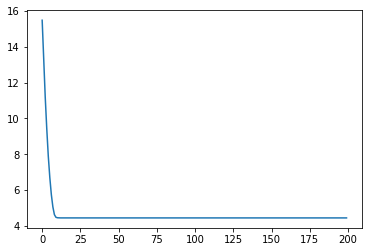

In [49]:
plt.plot(list(range(iteration_num)),losses)

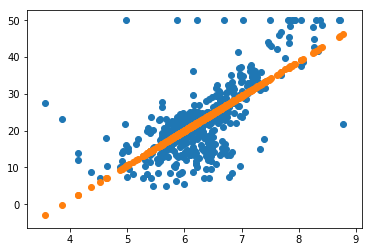

In [50]:
price_use_best_parameters = [price(r, best_k, best_b) for r in X_rm]

plt.scatter(X_rm,y)
plt.scatter(X_rm,price_use_current_parameters)

<评阅点>
+ 是否将Loss改成了“绝对值”(3')
+ 是否完成了偏导的重新定义(5')
+ 新的模型Loss是否能够收敛 (11’)